In [2]:
import numpy as np
from OPX_live_controller import VirtualGateSetMeasurement, QuAM
from qmucph.quam_mods.quam_mods import InOutSingleChannel_M
from quam.components.virtual_gate_set import VirtualGateSet
from quam.core import QuamRoot, quam_dataclass
from quam.components import SingleChannel, StickyChannelAddon, pulses, VirtualPulse
from dataclasses import field
from typing import List, Dict
from qm.qua import program, declare, fixed, for_, stream_processing, declare_stream, save, ramp_to_zero, align, wait
from qualang_tools.loops import from_array
import pprint
from copy import deepcopy


dividers = {'g1':1, 'g2':2, 'g3':3}
virt_rand = np.random.uniform(0,1, (3,2)) #np.ones((2,2)) - np.eye(2,2)*2 #
virtualisation_matrix = virt_rand * np.array(list(dividers.values()))[:,None]
machine = QuAM()
machine.gates = {
    "g1": SingleChannel(
        id="g1",
        opx_output=("con1", 1),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
    "g2": SingleChannel(
        id="g2",
        opx_output=("con1", 2),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
    "g3": SingleChannel(
        id="g3",
        opx_output=("con1", 3),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
}

machine.VirtualGateSet1 = VirtualGateSet(
    gates=["#/gates/g1", "#/gates/g2", "#/gates/g3"], # Be careful with ordering
    virtual_gates={"v1": virtualisation_matrix[:,0],
                    "v2": virtualisation_matrix[:,1],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

machine.VirtualGateSet2 = VirtualGateSet(
    gates=["#/gates/g1", "#/gates/g2", "#/gates/g3"], # Be careful with ordering
    virtual_gates={"v1": virtualisation_matrix[:,0],
                    "v2": virtualisation_matrix[:,1],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

machine.resonator = InOutSingleChannel_M(
    id="readout",
    opx_output=("con1", 1),
    opx_input=("con1", 1),
    intermediate_frequency=192307692,
    time_of_flight=372
    )

# config = machine.generate_config()

measurer = VirtualGateSetMeasurement(QuAM= machine,
                                    resolution=51,
                                    readout_time_us= 1,
                                    readout_amplitude=0.1,
                                    dividers = dividers)


2024-06-17 15:27:05,805 - qm - INFO     - Starting session: 3c7bf315-7ec2-4f77-ac69-360c0aa27e1d


TypeError: __init__() missing 1 required positional argument: 'qmm'

In [ ]:
virtualisation_matrix = virt_rand #np.array([[1,0],[0,1]])

new = measurer.change_virtualisation_matrix(None, None,virtualisation_matrix)['waveforms']
# print(new)
def get_nums(waveforms_dict):
    a = []
    for gate in ['g1','g2', 'g3']:
        for pulse in ['.big_pulse.wf','.slow_pulse.wf','.small_pulse.wf']:
            if isinstance(waveforms_dict[gate+pulse], dict):
                a.append(waveforms_dict[gate+pulse]['sample'])
            else:
                a.append(waveforms_dict[gate + pulse])
    return np.array(a)
test_change = get_nums(new)
test_virtual_gate_set = get_nums(measurer.config['waveforms'])
print(test_change)
print(test_virtual_gate_set)

print(np.array(test_virtual_gate_set) - np.array(test_change))


[0.01439293 0.04483846 0.00057572 0.08059391 0.02868328 0.00322376
 0.1132403  0.0094162  0.00452961]
[0.01439293 0.04483846 0.00057572 0.08059391 0.02868328 0.00322376
 0.1132403  0.0094162  0.00452961]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.38777878e-17  0.00000000e+00
 -8.67361738e-19]


In [ ]:
virt_rand

array([[0.89676927, 0.28785859],
       [0.28683284, 0.80593909],
       [0.06277463, 0.75493533]])

In [ ]:
dividers = {'g1':7.5, 'g2':9.5}
virtualisation_matrix = np.array([[1,0],[0,1]]) * np.array(list(dividers.values()))

In [ ]:
virtualisation_matrix

array([[7.5, 0. ],
       [0. , 9.5]])

# test on TL device

In [1]:
import numpy as np
from OPX_live_controller import VirtualGateSetMeasurement, QuAM
from qmucph.quam_mods.quam_mods import InOutSingleChannel_M
from quam.components.virtual_gate_set import VirtualGateSet
from quam.core import QuamRoot, quam_dataclass
from quam.components import SingleChannel, StickyChannelAddon, pulses, VirtualPulse, InOutSingleChannel
from dataclasses import field
from typing import List, Dict
from qm.qua import program, declare, fixed, for_, stream_processing, declare_stream, save, ramp_to_zero, align, wait
from qualang_tools.loops import from_array
import pprint
from copy import deepcopy
import matplotlib.pyplot as plt


machine = QuAM()

machine.gates = {
    "left_inner_dot_plunger": SingleChannel(
        id="left_inner_dot_plunger",
        opx_output=("con1", 4),
        sticky=StickyChannelAddon(duration=200, digital=False),

    ),
    "right_inner_dot_plunger": SingleChannel(
        id="right_inner_dot_plunger",
        opx_output=("con1", 6),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),
    "left_inner_dot_plunger_copy": SingleChannel(
        id="left_inner_dot_plunger_copy",
        opx_output=("con1", 4),
        sticky=StickyChannelAddon(duration=200, digital=False),

    ),
    "right_inner_dot_plunger_copy": SingleChannel(
        id="right_inner_dot_plunger_copy",
        opx_output=("con1", 6),
        sticky=StickyChannelAddon(duration=200, digital=False),
    ),

}

top_divider = 10.2
left_divider = 8.61
right_divider = 10
sensor_divider = 10

dividers = {'left_inner_dot_plunger':left_divider, 'right_inner_dot_plunger':right_divider,
            'left_inner_dot_plunger_copy':left_divider, 'right_inner_dot_plunger_copy':right_divider}
machine.VirtualGateSet1 = VirtualGateSet(
    gates=["#/gates/left_inner_dot_plunger", "#/gates/right_inner_dot_plunger"], # Be careful with ordering
    virtual_gates={"V_left_inner_dot_plunger": [1, 0], # [1*left_divider,0*right_divider],
                    "V_right_inner_dot_plunger": [0,1], #[0*left_divider,1*right_divider],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

machine.VirtualGateSet2 = VirtualGateSet(
    gates=["#/gates/left_inner_dot_plunger_copy", "#/gates/right_inner_dot_plunger_copy"], # Be careful with ordering
    virtual_gates={"V_left_inner_dot_plunger": [1, 0], # [1*left_divider,0*right_divider],
                    "V_right_inner_dot_plunger": [0,1], #[0*left_divider,1*right_divider],
                    }, 
    pulse_defaults=[
        pulses.SquarePulse(amplitude=None, length=None),
        pulses.SquarePulse(amplitude=None, length=None),
    ],
)

# machine.gates["left_inner_dot_plunger"].operations["CW"] = pulses.SquarePulse(length=100, amplitude=0.25)
# machine.gates["right_inner_dot_plunger"].operations["CW"] = pulses.SquarePulse(length=100, amplitude=0.25)


############################################################## multiple sensor readout
machine.resonator = InOutSingleChannel(
    id="T_sensor",
    opx_output=("con1", 1),
    opx_input=("con1", 1),
    intermediate_frequency=176553106,
    time_of_flight=400,
    )

# machine.resonators['T_sensor'].operations["readout"] = pulses.ConstantReadoutPulse(
#     length=5000, amplitude=0.1, integration_weights_angle=2.475, axis_angle=None
# )

# config = machine.generate_config()

# with open('quam_config.json', 'w') as f:
#     json.dump(quam_config, f, indent=4)
    


2024-06-18 09:56:39,958 - qm - INFO     - Starting session: 45c2f5e3-1678-4622-b19a-1970653f16fc


In [2]:
np.array([gate_name for gate_name in machine.gates if 'copy' not in gate_name])

array(['left_inner_dot_plunger', 'right_inner_dot_plunger'], dtype='<U23')

In [2]:
class Virt2(VirtualGateSetMeasurement):
    def do_one_map(self, I_stream, Q_stream):
        amplitude_scale_slow = declare(fixed)
        small_jumps = declare(int)
        with for_(
            *from_array(amplitude_scale_slow, np.linspace(-1, 1, self.resolution))
        ):
            
            self.quam.align_all()
            self.quam.VirtualGateSet1.play(
                "slow_pulse",
                amplitude_scale_slow)

            self.quam.VirtualGateSet2.play(
                "big_pulse",
            )
            wait(self.buffer_time_clk)
            i_var, q_var = self.quam.resonator.measure("readout")
            save(i_var, I_stream)
            save(q_var, Q_stream)

            # wait(1000)

            with for_(*from_array(small_jumps, range(self.resolution-1))):
                self.quam.VirtualGateSet2.play(
                    "small_pulse",
                )
                wait(self.buffer_time_clk, self.quam.resonator.id)
                i_var, q_var = self.quam.resonator.measure("readout")
                save(i_var, I_stream)
                save(q_var, Q_stream)
                # wait(1000)

            for gate in self.quam.gates:
                ramp_to_zero(gate, duration=1)

            # Do correction

            self.quam.VirtualGateSet1.play("slow_pulse", -1 * amplitude_scale_slow)
            self.quam.VirtualGateSet2.play("big_pulse", -1)
            # wait(self.readout_time_clk + self.buffer_time_clk)

            with for_(*from_array(small_jumps, range(self.resolution-1))):
                self.quam.VirtualGateSet2.play("small_pulse", amplitude_scale=-1)
                # wait(self.buffer_time_clk)
                # i_var, q_var = self.quam.resonator.measure("readout")

            self.quam.align_all()
            for gate in self.quam.gates:
                ramp_to_zero(gate, duration=1)

            wait(100)

In [7]:
81*81*(1+0.4)*1e-6*100

0.91854

In [3]:
from qm.QuantumMachinesManager import QuantumMachinesManager
qmm=QuantumMachinesManager(host='10.209.64.165', cluster_name = "slot_a")
old_params = False

k_params = {'qmm': qmm,
            'QuAM':machine,
            'resolution':81,
            'readout_time_us': 1,
            'readout_amplitude':0.1,
            'dividers': dividers,
            'buffer_time_ns': 400,
            'opx_repetitions': 100,
            'sweep_range': 0.005,
            'integration_weights_angle':2.475,
            }

old_k_params = {'qmm': qmm,
                'QuAM':machine,
                'resolution':51,
                'readout_time_us': 5,
                'readout_amplitude':0.1,
                'dividers': dividers,
                'buffer_time_ns': 1000,
                'opx_repetitions': 200,
                'sweep_range': 0.005,
                'integration_weights_angle':2.475,
                }

# if old_params:
#     measurer = VirtualGateSetMeasurement(
#                                         qmm = qmm,
#                                         QuAM= machine,
#                                         resolution=81,
#                                         readout_time_us= 5,
#                                         readout_amplitude=0.1,
#                                         dividers = dividers,
#                                         buffer_time_ns = 1000,
#                                         opx_repetitions = 200,
#                                         sweep_range = 0.005,
#                                         integration_weights_angle=2.475,
#                                         )


C:\Users\T7\AppData\Local\Temp\ipykernel_40940\3315231551.py:1: DeprecationWarning: 'qm.QuantumMachinesManager.QuantumMachinesManager' is moved as of 1.1.2 and will be removed in 1.2.0. use 'qm.QuantumMachinesManager' instead
  from qm.QuantumMachinesManager import QuantumMachinesManager


2024-06-18 09:56:44,203 - qm - INFO     - Performing health check
2024-06-18 09:56:44,210 - qm - INFO     - Health check passed


2024-06-17 16:14:28,937 - qm - INFO     - Compiling program
2024-06-17 16:14:29,515 - qm - INFO     - Simulating program


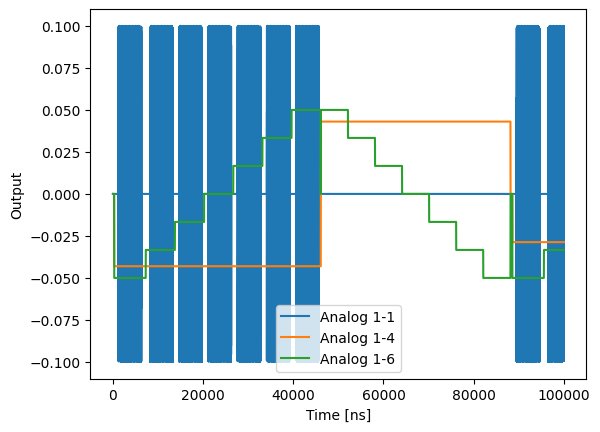

In [25]:
from opx_tools.opx_setup import simulate_program
          
# measurer = VirtualGateSetMeasurement(**k_params)


# plt.figure()
# simulate_program(qmm, measurer.program, measurer.config, int(1e5))

measurer = Virt2(**old_k_params)
plt.figure()
simulate_program(qmm, measurer.program, measurer.config, int(1e5))

2024-06-17 16:16:04,770 - qm - INFO     - Compiling program
2024-06-17 16:16:05,324 - qm - INFO     - Simulating program


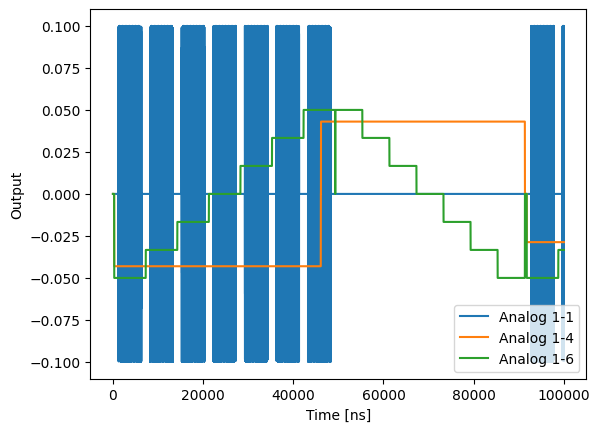

In [30]:
from opx_tools.opx_setup import simulate_program
          
# measurer = VirtualGateSetMeasurement(**k_params)


# plt.figure()
# simulate_program(qmm, measurer.program, measurer.config, int(1e5))

measurer = Virt2(**old_k_params)
plt.figure()
simulate_program(qmm, measurer.program, measurer.config, int(1e5))

In [ ]:
from opx_tools.opx_setup import program_to_file
program_to_file(measurer.program, measurer.config, 'test_script.py')

In [ ]:
measurer.job.halt()

True

2024-06-17 14:57:17,343 - qm - INFO     - Compiling program
compile done
data fetcher done
2024-06-17 15:01:35,588 - qm - INFO     - Compiling program
compile done
data fetcher done


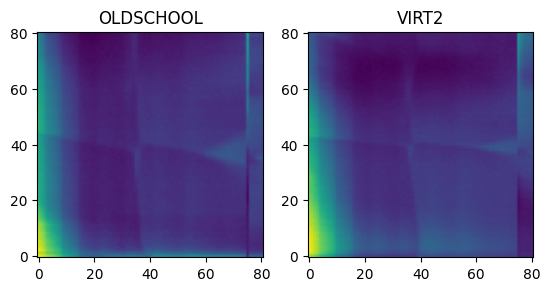

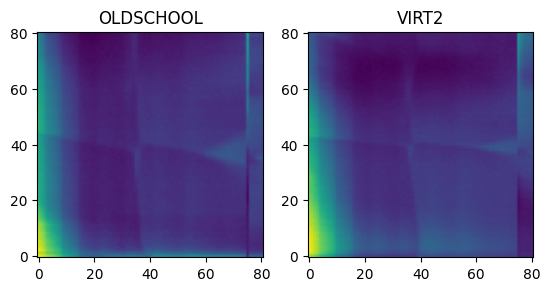

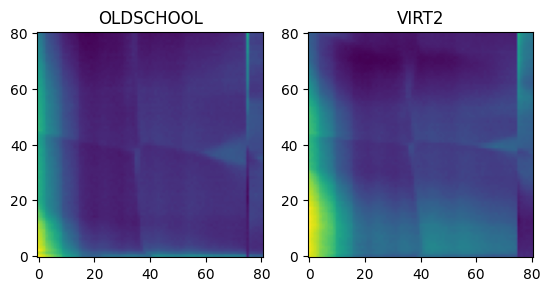

In [ ]:
from opx_tools.opx_setup import simulate_program

measurer = Virt2(**old_k_params)
print('compile done')
measurer.start_acquisition()
print('data fetcher done')
# print('started')
datasets2 = []

for i in range(1):
    datasets2.append(measurer.fetch_results())
measurer.job.halt()

measurer = VirtualGateSetMeasurement(**old_k_params)
print('compile done')
measurer.start_acquisition()
print('data fetcher done')
# print('started')
datasets1 = []

for i in range(1):
    datasets1.append(measurer.fetch_results())

measurer.job.halt()

for dset1, dset2 in zip(datasets1, datasets2):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(dset1[0]**2 + dset1[1]**2, origin='lower')
    axes[1].imshow(dset2[0]**2 + dset2[1]**2, origin='lower')

    axes[1].set_title('VIRT2')
    axes[0].set_title('OLDSCHOOL')


DIVIDERS SHOULD NOT BE APPLIED TO VIRTUAL GATES ALREADY!!!
2024-06-18 09:50:17,343 - qm - INFO     - Compiling program
compile done
data fetcher done
1 done
data fetcher done


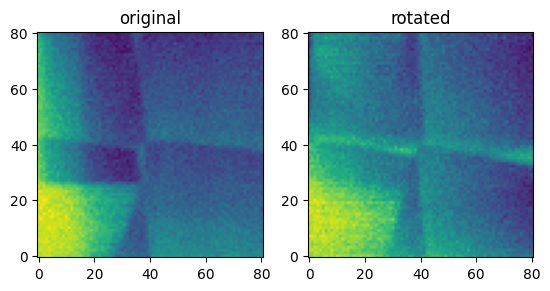

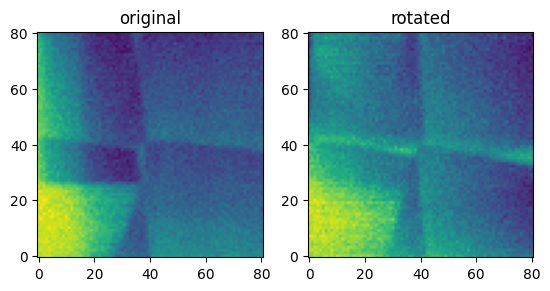

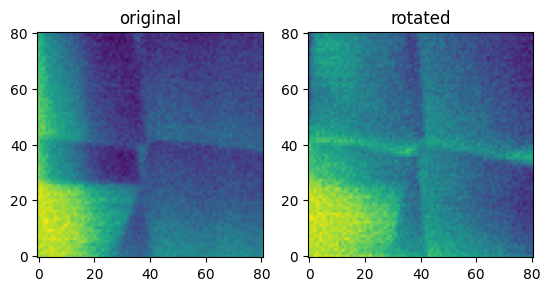

In [5]:
measurer = Virt2(**k_params)
print('compile done')
measurer.start_acquisition()
print('data fetcher done')
# print('started')
datasets1 = []

for i in range(3):
    datasets1.append(measurer.fetch_results())
measurer.job.halt()

print('1 done')
# measurer = Virt2(**k_params)
# print('compile done')
virtualisation_matrix = np.array([[0,1],[1,0]])
overrides = measurer.get_overrides_from_virtual_matrix(virtualisation_matrix)
measurer.start_acquisition(overrides = overrides)
print('data fetcher done')
# print('started')
datasets2 = []

for i in range(3):
    datasets2.append(measurer.fetch_results())
measurer.job.halt()


for dset1, dset2 in zip(datasets1, datasets2):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(dset1[0], origin='lower')
    axes[1].imshow(dset2[0], origin='lower')

    axes[0].set_title('original')
    axes[1].set_title('rotated')

In [10]:
machine.VirtualGateSet1.gates

['#/gates/left_inner_dot_plunger', '#/gates/right_inner_dot_plunger']

In [5]:
from opx_tools.opx_setup import fetch_all_data

all_data = fetch_all_data(measurer.job)

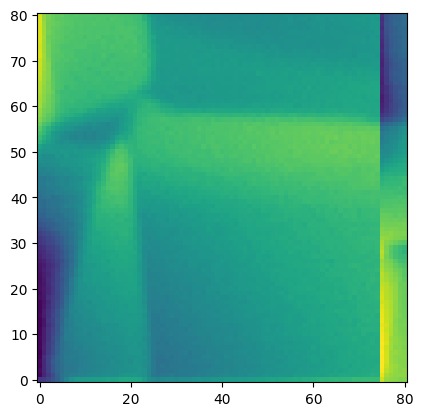

In [8]:
plt.imshow(all_data['I'], origin='lower')

In [12]:
all_data['I_full']

array([], shape=(0, 81, 81), dtype=float64)

In [4]:
measurer = Virt2(**k_params)

DIVIDERS SHOULD NOT BE APPLIED TO VIRTUAL GATES ALREADY!!!
2024-06-18 09:56:45,783 - qm - INFO     - Compiling program


In [ ]:
virtualisation_matrix = np.array([[0,1],[1,0]])

new = measurer.get_overrides_from_virtualisation_matrix(virtualisation_matrix)['waveforms']
# print(new)
def get_nums(waveforms_dict):
    a = []
    for pulse in waveforms_dict:
        if 'pulse' in pulse:
            a.append((pulse, waveforms_dict[pulse]))
    return np.array(a)
test_change = get_nums(new)
test_virtual_gate_set = get_nums(measurer.config['waveforms'])
print(test_change)
print(test_virtual_gate_set)

# print(np.array(test_virtual_gate_set) - np.array(test_change))


[['left_inner_dot_plunger.slow_pulse.wf' '0.0']
 ['right_inner_dot_plunger.slow_pulse.wf' '0.1']
 ['left_inner_dot_plunger_copy.big_pulse.wf' '0.0861']
 ['left_inner_dot_plunger_copy.small_pulse.wf' '0.0021525']
 ['right_inner_dot_plunger_copy.big_pulse.wf' '0.0']
 ['right_inner_dot_plunger_copy.small_pulse.wf' '0.0']]
[['left_inner_dot_plunger.slow_pulse.wf'
  {'type': 'constant', 'sample': 0.0861}]
 ['right_inner_dot_plunger.slow_pulse.wf'
  {'type': 'constant', 'sample': 0.0}]
 ['left_inner_dot_plunger_copy.big_pulse.wf'
  {'type': 'constant', 'sample': 0.0}]
 ['right_inner_dot_plunger_copy.big_pulse.wf'
  {'type': 'constant', 'sample': -0.1}]
 ['left_inner_dot_plunger_copy.small_pulse.wf'
  {'type': 'constant', 'sample': 0.0}]
 ['right_inner_dot_plunger_copy.small_pulse.wf'
  {'type': 'constant', 'sample': 0.0025}]]


In [ ]:
measurer.job.is_paused()

True

In [ ]:
all_data2['I_full'].shape

(3, 6561)

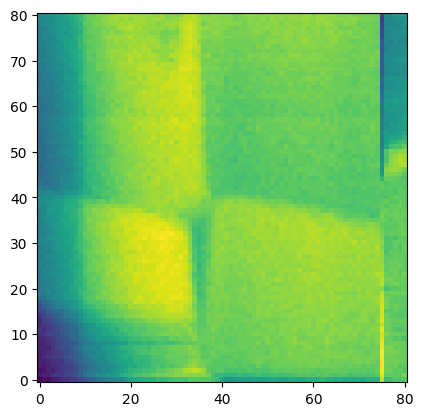

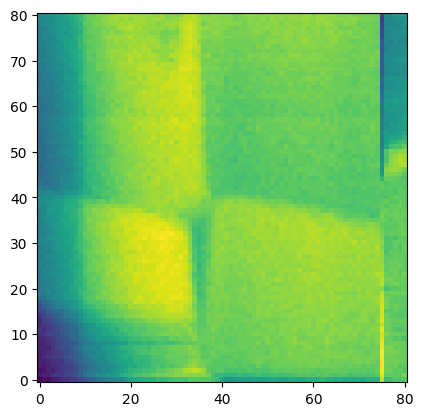

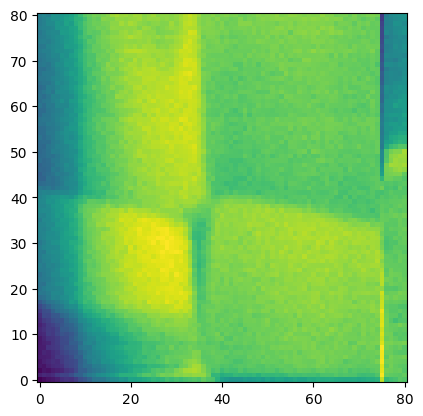

In [ ]:
import matplotlib.pyplot as plt
for dset1 in datasets1 :
    fig, axes = plt.subplots()
    axes.imshow(dset1[0], origin='lower')

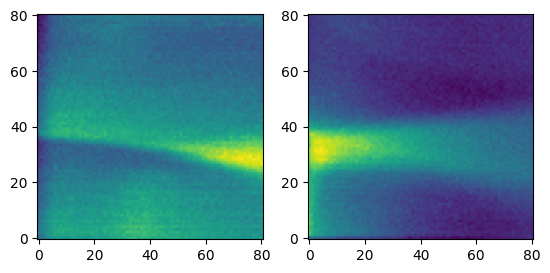

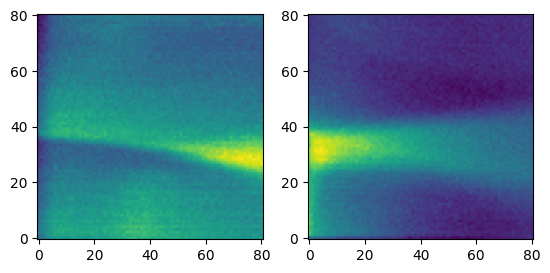

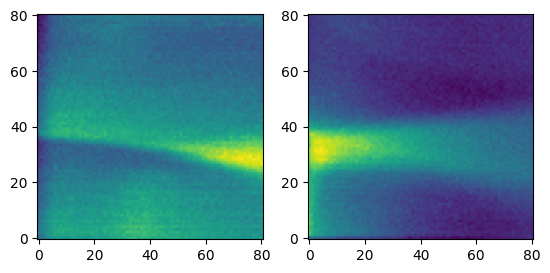

In [ ]:
import matplotlib.pyplot as plt
for dset1, dset2 in zip(datasets1, datasets2):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(dset1[0]**2 + dset1[1]**2, origin='lower')
    axes[1].imshow(dset2[0]**2 + dset2[1]**2, origin='lower')
# plt.imshow(datasets[0])

In [ ]:
# with open(opx_config,'r') as file:
#     config = json.load(file)

qmm=QuantumMachinesManager(host='10.209.64.165', cluster_name = "slot_a")
        #qmm.close_all_quantum_machines()
qm=qmm.open_qm(config, close_other_machines=True)

2024-06-13 09:53:51,909 - qm - INFO     - Performing health check
2024-06-13 09:53:51,920 - qm - INFO     - Health check passed


# test with live_plotting

In [1]:
%load_ext autoreload
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
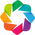

2024-06-19 17:44:19,360 - qm - INFO     - Starting session: bd0aeaac-e027-4569-842e-7e1a8ad3a2e1


In [2]:
from qstream.qm.live_plotting import Live_plot_handler
import numpy as np
from OPX_live_controller import VirtualGateSetMeasurement, QuAM
from qmucph.quam_mods.quam_mods import InOutSingleChannel_M
from quam.components.virtual_gate_set import VirtualGateSet
from quam.core import QuamRoot, quam_dataclass
from quam.components import SingleChannel, StickyChannelAddon, pulses, VirtualPulse, InOutSingleChannel
from dataclasses import field
from typing import List, Dict
from qm.qua import program, declare, fixed, for_, stream_processing, declare_stream, save, ramp_to_zero, align, wait
from qualang_tools.loops import from_array
import pprint
from copy import deepcopy
import matplotlib.pyplot as plt

In [3]:
# class Virt2(VirtualGateSetMeasurement):
#     def do_one_map(self, I_stream, Q_stream):
#         amplitude_scale_slow = declare(fixed)
#         small_jumps = declare(int)
#         with for_(
#             *from_array(amplitude_scale_slow, np.linspace(-1, 1, self.resolution))
#         ):
            
#             self.quam.align_all()
#             self.quam.VirtualGateSet1.play(
#                 "slow_pulse",
#                 amplitude_scale_slow)

#             self.quam.VirtualGateSet2.play(
#                 "big_pulse",
#             )
#             wait(self.buffer_time_clk)
#             i_var, q_var = self.quam.resonator.measure("readout")
#             save(i_var, I_stream)
#             save(q_var, Q_stream)

#             # wait(1000)

#             with for_(*from_array(small_jumps, range(self.resolution-1))):
#                 self.quam.VirtualGateSet2.play(
#                     "small_pulse",
#                 )
#                 wait(self.buffer_time_clk, self.quam.resonator.id)
#                 i_var, q_var = self.quam.resonator.measure("readout")
#                 save(i_var, I_stream)
#                 save(q_var, Q_stream)
#                 # wait(1000)

#             for gate in self.quam.gates:
#                 ramp_to_zero(gate, duration=1)

#             # Do correction

#             self.quam.VirtualGateSet1.play("slow_pulse", -1 * amplitude_scale_slow)
#             self.quam.VirtualGateSet2.play("big_pulse", -1)
#             # wait(self.readout_time_clk + self.buffer_time_clk)

#             with for_(*from_array(small_jumps, range(self.resolution-1))):
#                 self.quam.VirtualGateSet2.play("small_pulse", amplitude_scale=-1)
#                 # wait(self.buffer_time_clk)
#                 # i_var, q_var = self.quam.resonator.measure("readout")

#             self.quam.align_all()
#             for gate in self.quam.gates:
#                 ramp_to_zero(gate, duration=1)

#             wait(100)

In [4]:
# import numpy as np
# from OPX_live_controller import VirtualGateSetMeasurement, QuAM
# from qmucph.quam_mods.quam_mods import InOutSingleChannel_M
# from quam.components.virtual_gate_set import VirtualGateSet
# from quam.core import QuamRoot, quam_dataclass
# from quam.components import SingleChannel, StickyChannelAddon, pulses, VirtualPulse, InOutSingleChannel
# from dataclasses import field
# from typing import List, Dict
# from qm.qua import program, declare, fixed, for_, stream_processing, declare_stream, save, ramp_to_zero, align, wait
# from qualang_tools.loops import from_array
# import pprint
# from copy import deepcopy
# import matplotlib.pyplot as plt


# machine = QuAM()

# machine.gates = {
#     "left_inner_dot_plunger": SingleChannel(
#         id="left_inner_dot_plunger",
#         opx_output=("con1", 4),
#         sticky=StickyChannelAddon(duration=200, digital=False),

#     ),
#     # "right_inner_dot_plunger": SingleChannel(
#     #     id="right_inner_dot_plunger",
#     #     opx_output=("con1", 6),
#     #     sticky=StickyChannelAddon(duration=200, digital=False),
#     # ),
#     "sensor_plunger": SingleChannel(
#         id="sensor_plunger",
#         opx_output=("con1", 5),
#         sticky=StickyChannelAddon(duration=200, digital=False),
#     ),
#     "sensor_plunger": SingleChannel(
#         id="sensor_plunger",
#         opx_output=("con1", 3),
#         sticky=StickyChannelAddon(duration=200, digital=False),
#     ),
#     "left_inner_dot_plunger_copy": SingleChannel(
#         id="left_inner_dot_plunger_copy",
#         opx_output=("con1", 4),
#         sticky=StickyChannelAddon(duration=200, digital=False),

#     ),
#     # "right_inner_dot_plunger_copy": SingleChannel(
#     #     id="right_inner_dot_plunger_copy",
#     #     opx_output=("con1", 6),
#     #     sticky=StickyChannelAddon(duration=200, digital=False),
#     # ),
#     "sensor_plunger_copy": SingleChannel(
#         id="sensor_plunger_copy",
#         opx_output=("con1", 5),
#         sticky=StickyChannelAddon(duration=200, digital=False),
#     ),
#     "sensor_plunger_copy": SingleChannel(
#         id="sensor_plunger_copy",
#         opx_output=("con1", 3),
#         sticky=StickyChannelAddon(duration=200, digital=False),
#     ),

# }

# top_divider = 10.2
# left_divider = 8.61
# right_divider = 10
# sensor_divider = 10

# dividers = {'left_inner_dot_plunger':left_divider, 'right_inner_dot_plunger':right_divider, 'sensor_plunger': sensor_divider,
#             'left_inner_dot_plunger_copy':left_divider, 'right_inner_dot_plunger_copy':right_divider, 'sensor_plunger_copy': sensor_divider,}
# machine.VirtualGateSet1 = VirtualGateSet(
#     gates=["#/gates/left_inner_dot_plunger", "#/gates/right_inner_dot_plunger", "#/gates/sensor_plunger"], # Be careful with ordering
#     virtual_gates={"V_left_inner_dot_plunger": [1, 0, 0], # [1*left_divider,0*right_divider],
#                     "V_right_inner_dot_plunger": [0, 1, 0], #[0*left_divider,1*right_divider],
#                     }, 
#     pulse_defaults=[
#         pulses.SquarePulse(amplitude=None, length=None),
#         pulses.SquarePulse(amplitude=None, length=None),
#         pulses.SquarePulse(amplitude=None, length=None),
#     ],
# )

# machine.VirtualGateSet2 = VirtualGateSet(
#     gates=["#/gates/left_inner_dot_plunger_copy", "#/gates/right_inner_dot_plunger_copy","#/gates/sensor_plunger_copy"], # Be careful with ordering
#     virtual_gates={"V_left_inner_dot_plunger": [1, 0, 0], # [1*left_divider,0*right_divider],
#                     "V_right_inner_dot_plunger": [0, 1, 0], #[0*left_divider,1*right_divider],
#                     }, 
#     pulse_defaults=[
#         pulses.SquarePulse(amplitude=None, length=None),
#         pulses.SquarePulse(amplitude=None, length=None),
#         pulses.SquarePulse(amplitude=None, length=None),
#     ],
# )

# # machine.gates["left_inner_dot_plunger"].operations["CW"] = pulses.SquarePulse(length=100, amplitude=0.25)
# # machine.gates["right_inner_dot_plunger"].operations["CW"] = pulses.SquarePulse(length=100, amplitude=0.25)


# ############################################################## multiple sensor readout
# machine.resonator = InOutSingleChannel(
#     id="T_sensor",
#     opx_output=("con1", 1),
#     opx_input=("con1", 1),
#     intermediate_frequency=176553106,
#     time_of_flight=400,
#     )

# # machine.resonators['T_sensor'].operations["readout"] = pulses.ConstantReadoutPulse(
# #     length=5000, amplitude=0.1, integration_weights_angle=2.475, axis_angle=None
# # )

# # config = machine.generate_config()

# # with open('quam_config.json', 'w') as f:
# #     json.dump(quam_config, f, indent=4)
    


In [5]:
from OPX_live_controller import VirtualGateSetMeasurement, QuAM

In [6]:
import numpy as np

In [7]:
A = np.array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.49607568, -0.0203078 , -0.00597634,  1.0006717 , -0.01973169,
        -0.02148331],
       [-0.09711623, -0.58241478,  0.02543468, -0.02612058,  0.99944464,
        -0.02792331],
       [-0.05531018, -0.16485922, -0.65775079, -0.00760405,  0.0198886 ,
         1.        ]])

A[3,1]

-0.0203078

In [8]:
from OPX_live_controller import make_quam
machine = make_quam(gates= {'left_inner_dot_plunger': 4, 
                            'right_inner_dot_plunger': 6, 
                            'T_sensor_plunger': 3,
                            },
                            # {Y axis, X axis}
                            virtual_gates = {'V_left_inner_dot_plunger': [1,0,A[3,1]],
                                            'V_right_innder_dot_plunger': [0,1,A[3,2]],
                                            },
                            resonator_input= 1,
                            resonator_output = 1,
                            resonator_freq= 176553106, #T: 176553106, L:206482412, R:255904522
                            resonator_time_of_flight = 400,
                            controller= "con1")
top_divider = 10.2
left_divider = 8.61
right_divider = 10
sensor_divider = 10

dividers = {'left_inner_dot_plunger':left_divider, 'right_inner_dot_plunger': right_divider, 'T_sensor_plunger':sensor_divider,
            'left_inner_dot_plunger_copy':left_divider, 'right_inner_dot_plunger_copy': right_divider, 'T_sensor_plunger_copy': sensor_divider}

# dividers = {'left_inner_dot_plunger':left_divider, 'right_inner_dot_plunger':right_divider, 'sensor_plunger': sensor_divider,
#             'left_inner_dot_plunger_copy':left_divider, 'right_inner_dot_plunger_copy':right_divider, 'sensor_plunger_copy': sensor_divider,}

In [9]:
81**2*4*1e-6*30

0.78732

In [10]:
from qm.QuantumMachinesManager import QuantumMachinesManager
actual_test = True
if actual_test:
    qmm=QuantumMachinesManager(host='10.209.64.165', cluster_name = "slot_a")
else:
    qmm = None

old_params = False

k_params = {'qmm': qmm,
            'QuAM':machine,
            'resolution':81,
            'readout_time_us': 3,
            'readout_amplitude':0.1,
            'dividers': dividers,
            'buffer_time_ns': 1000,
            'opx_repetitions': 30,
            'scan_range': 0.01,
            'integration_weights_angle':2.475,
            }

k_params_2 = {'qmm': qmm,
            'QuAM':machine,
            'resolution':7,
            'readout_time_us': 1,
            'readout_amplitude':0.1,
            'dividers': dividers,
            'buffer_time_ns': 1000,
            'opx_repetitions': 30,
            'scan_range': 0.01,
            'integration_weights_angle':2.475,
            }

old_k_params = {'qmm': None,
                'QuAM':machine,
                'resolution':51,
                'readout_time_us': 5,
                'readout_amplitude':0.1,
                'dividers': dividers,
                'buffer_time_ns': 1000,
                'opx_repetitions': 200,
                'scan_range': 0.005,
                'integration_weights_angle':2.475,
                }

# if old_params:
#     measurer = VirtualGateSetMeasurement(
#                                         qmm = qmm,
#                                         QuAM= machine,
#                                         resolution=81,
#                                         readout_time_us= 5,
#                                         readout_amplitude=0.1,
#                                         dividers = dividers,
#                                         buffer_time_ns = 1000,
#                                         opx_repetitions = 200,
#                                         sweep_range = 0.005,
#                                         integration_weights_angle=2.475,
#                                         )


C:\Users\T7\AppData\Local\Temp\ipykernel_14904\3719975597.py:1: DeprecationWarning: 'qm.QuantumMachinesManager.QuantumMachinesManager' is moved as of 1.1.2 and will be removed in 1.2.0. use 'qm.QuantumMachinesManager' instead
  from qm.QuantumMachinesManager import QuantumMachinesManager


2024-06-19 17:44:26,145 - qm - INFO     - Performing health check
2024-06-19 17:44:26,152 - qm - INFO     - Health check passed


In [11]:
from OPX_live_controller import VirtualGateSetMeasurement, VirtualGateSetMeasurementBetter
# live_plotter = VirtualGateSetMeasurement(**k_params, make_program=True)
live_plotter = VirtualGateSetMeasurement(**k_params, make_program=True)
# live_plotter.virtual_getters['V_left_inner_dot_plunger_to_left_inner_dot_plunger']()

DIVIDERS SHOULD NOT BE APPLIED TO VIRTUAL GATES ALREADY!!!
2024-06-19 17:44:27,295 - qm - WARNING  - Open QM ended with warning 0: Opening a new Quantum Machine and closing Quantum Machines: 
2024-06-19 17:44:27,296 - qm - WARNING  - Open QM ended with warning 0: Quantum Machine qm-1718812297428 is canceling running job 1717157201089.
2024-06-19 17:44:27,299 - qm - INFO     - Compiling program


In [12]:
# from opx_tools.opx_setup import simulate_program
# live_plotter_2 = VirtualGateSetMeasurementBetter(**k_params_2, make_program=True)
# samples = simulate_program(qmm, live_plotter_2.program, live_plotter_2.config, 1e5)

In [13]:
# import matplotlib.pyplot as plt
# ch1 = samples.con1.analog['4']
# ch2 = samples.con1.analog['6']
# sens = samples.con1.analog['1']
# fig, ax = plt.subplots()
# ax.plot(ch1)#[:12000])
# ax.plot(ch2)#[:12000])

# # ax.twinx().plot(sens[:12000], '--',c='r')

In [14]:
%run -i "F:\qcodes_local\Tsung-Lin\202406\0_initialization.py"

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\T7\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\T7\.qcodes\logs\240619-14904-qcodes.log


In [15]:
%run -i "F:\qcodes_local\Tsung-Lin\202406\1_station_instruement.py"

Connected to: QDevil QDAC-II (serial:173, firmware:7-0.17.5) in 0.19s
Connected to: Keysight Technologies 34465A (serial:MY54501243, firmware:A.03.00-02.40-03.00-00.52-02-01) in 0.09s
Connected to: Keysight Technologies 34465A (serial:MY57512797, firmware:A.03.00-02.40-03.00-00.52-04-01) in 0.09s
Connected to: Keysight Technologies 34465A (serial:MY57512905, firmware:A.03.00-02.40-03.00-00.52-04-01) in 0.09s
Connected to: OXFORD INSTRUMENTS MERCURY IPS (serial:122250241, firmware:2.2.6.5) in 0.09s
Connected to: Mini-Circuits  (serial:MN=RCDAT-6000-60, firmware:SN=11908290032) in 0.03s


In [16]:
%run -i "F:\qcodes_local\Tsung-Lin\202406\2_functions.py"

In [17]:
all_output_range_control('low')

qdacII_A_ch01 output range has changed to LOW
qdacII_A_ch02 output range has changed to LOW
qdacII_A_ch03 output range has changed to LOW
qdacII_A_ch04 output range has changed to LOW
qdacII_A_ch05 output range has changed to LOW
qdacII_A_ch06 output range has changed to LOW
qdacII_A_ch07 output range has changed to LOW
qdacII_A_ch08 output range has changed to LOW
qdacII_A_ch09 output range has changed to LOW
qdacII_A_ch10 output range has changed to LOW
qdacII_A_ch11 output range has changed to LOW
qdacII_A_ch12 output range has changed to LOW
qdacII_A_ch13 output range has changed to LOW
qdacII_A_ch14 output range has changed to LOW
qdacII_A_ch15 output range has changed to LOW
qdacII_A_ch16 output range has changed to LOW
qdacII_A_ch17 output range has changed to LOW
qdacII_A_ch18 output range has changed to LOW
qdacII_A_ch19 output range has changed to LOW
qdacII_A_ch20 output range has changed to LOW
qdacII_A_ch21 output range has changed to LOW
qdacII_A_ch22 output range has cha

In [18]:
all_ch_step_inter_delay_set(0.001,0.001)

qdacII_A_ch01 step:  0.001  inter_delay:  0.001
qdacII_A_ch02 step:  0.001  inter_delay:  0.001
qdacII_A_ch03 step:  0.001  inter_delay:  0.001
qdacII_A_ch04 step:  0.001  inter_delay:  0.001
qdacII_A_ch05 step:  0.001  inter_delay:  0.001
qdacII_A_ch06 step:  0.001  inter_delay:  0.001
qdacII_A_ch07 step:  0.001  inter_delay:  0.001
qdacII_A_ch08 step:  0.001  inter_delay:  0.001
qdacII_A_ch09 step:  0.001  inter_delay:  0.001
qdacII_A_ch10 step:  0.001  inter_delay:  0.001
qdacII_A_ch11 step:  0.001  inter_delay:  0.001
qdacII_A_ch12 step:  0.001  inter_delay:  0.001
qdacII_A_ch13 step:  0.001  inter_delay:  0.001
qdacII_A_ch14 step:  0.001  inter_delay:  0.001
qdacII_A_ch15 step:  0.001  inter_delay:  0.001
qdacII_A_ch16 step:  0.001  inter_delay:  0.001
qdacII_A_ch17 step:  0.001  inter_delay:  0.001
qdacII_A_ch18 step:  0.001  inter_delay:  0.001
qdacII_A_ch19 step:  0.001  inter_delay:  0.001
qdacII_A_ch20 step:  0.001  inter_delay:  0.001
qdacII_A_ch21 step:  0.001  inter_delay:

In [19]:
extra_controllers = {
"top_BNC07": (qdac.BNC07, 0.0001, qdac.BNC07()), #name, (function_parameter, step_value, start_value)
"left_BNC36": (qdac.BNC36, 0.0001, qdac.BNC36()),
"right_BNC12": (qdac.BNC12, 0.0001, qdac.BNC12()),
"barrier_BNC05": (qdac.BNC05, 0.0005, qdac.BNC05()),
"barrier_BNC34": (qdac.BNC34, 0.0005, qdac.BNC34()),
"barrier_BNC19": (qdac.BNC19, 0.0005, qdac.BNC19()),
"top_S_BNC10": (qdac.BNC10, 0.0005, qdac.BNC10()),
"left_S_BNC43": (qdac.BNC43, 0.0005, qdac.BNC43()),
"right_S_BNC29": (qdac.BNC29, 0.0005, qdac.BNC29()),
# "BNC07": (qdac.BNC07, 0.0001, qdac.BNC07()),
}
plotter = Live_plot_handler(live_plotter, resolution= k_params['resolution'], extra_controllers = extra_controllers)

In [ ]:
plotter.start_stream(refresh_period=3000) #start livestreaming

INFO:bokeh.server.server:Starting Bokeh server version 3.4.1 (running on Tornado 6.3.3)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)
DEBUG:bokeh.server.tornado:These host origins can connect to the websocket: ['localhost:58396']
DEBUG:bokeh.server.tornado:Patterns are:
DEBUG:bokeh.server.tornado:  [('/favicon.ico',
DEBUG:bokeh.server.tornado:    <class 'bokeh.server.views.ico_handler.IcoHandler'>,
DEBUG:bokeh.server.tornado:    {'app': <bokeh.server.tornado.BokehTornado object at 0x00000210DD755940>}),
DEBUG:bokeh.server.tornado:   ('/?',
DEBUG:bokeh.server.tornado:    <class 'panel.io.server.DocHandler'>,
DEBUG:bokeh.server.tornado:    {'application_context': <bokeh.server.contexts.ApplicationContext object at 0x00000210DD755AC0>,
DEBUG:bokeh.server.tornado:     'bokeh_websocket_path': '/ws'}),
DEBUG:bokeh.server.tornado:   ('/ws',
DEBUG:bokeh.server.tornado:    <class 'bokeh.server.views.ws.WSHandler'>,
DEBUG:bokeh.server.tornado:    {'appli

Launching server at http://localhost:58396


DEBUG:bokeh.server.views.ws:Subprotocol header received
INFO:bokeh.server.views.ws:WebSocket connection opened
DEBUG:bokeh.server.views.ws:Receiver created for Protocol()
DEBUG:bokeh.server.views.ws:ProtocolHandler created for Protocol()
INFO:bokeh.server.views.ws:ServerConnection created
DEBUG:bokeh.server.session:Sending pull-doc-reply from session 'AFaKpQDTwhJCOOS9ozUlQY5xcBpokSkF3IMSVienJ8bs'


In [43]:
def increment_top_reservior_BNC20(val = -1e-3):
    val_20 = qdac.BNC20()
    qdac.BNC20(val_20+val)

In [21]:
live_plotter.job.halt()
plotter.video.close()

In [14]:
live_plotter.virtual_matrix

array([[ 1.  ,  0.  ],
       [-0.57,  1.  ]])

In [17]:
A = live_plotter.virtual_matrix

np.linalg.inv(A)

array([[1.   , 0.   ],
       [0.013, 1.   ]])

In [28]:
# live_plotter = VirtualGateSetMeasurement
live_plotter.start_acquisition()

In [31]:
# plotter = LiveStream class
data_for_testing = plotter.video.videorunningaverage.get()
data_for_testing

array([[-0.00073494, -0.0007568 , -0.00079139, ..., -0.00104671,
        -0.00104718, -0.00106759],
       [-0.00072972, -0.00074676, -0.00077757, ..., -0.00105552,
        -0.00104976, -0.00105435],
       [-0.00075211, -0.00076914, -0.00079035, ..., -0.00105563,
        -0.00104005, -0.00105117],
       ...,
       [-0.00097209, -0.00096631, -0.00099098, ..., -0.00098769,
        -0.00099226, -0.00096504],
       [-0.00093804, -0.00097509, -0.00098257, ..., -0.0009799 ,
        -0.00097135, -0.00097598],
       [-0.00097315, -0.00097019, -0.00096971, ..., -0.00099117,
        -0.00098672, -0.00097378]])

In [34]:
data_for_testing.shape

(81, 81)

## mul sensor testing

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
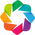

2024-06-19 17:17:55,605 - qm - INFO     - Starting session: c6a7c80b-d7e6-4938-8dee-6dba50df7c2b


In [1]:
from qstream.qm.live_plotting import Live_plot_handler
import numpy as np
from OPX_live_controller import VirtualGateSetMeasurement, QuAM
from qmucph.quam_mods.quam_mods import InOutSingleChannel_M
from quam.components.virtual_gate_set import VirtualGateSet
from quam.core import QuamRoot, quam_dataclass
from quam.components import SingleChannel, StickyChannelAddon, pulses, VirtualPulse, InOutSingleChannel
from dataclasses import field
from typing import List, Dict
from qm.qua import program, declare, fixed, for_, stream_processing, declare_stream, save, ramp_to_zero, align, wait
from qualang_tools.loops import from_array
import pprint
from copy import deepcopy
import matplotlib.pyplot as plt
from OPX_live_controller_mul_resonators import VirtualGateSetMeasurement, QuAM

In [2]:
A = np.array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.49607568, -0.0203078 , -0.00597634,  1.0006717 , -0.01973169,
        -0.02148331],
       [-0.09711623, -0.58241478,  0.02543468, -0.02612058,  0.99944464,
        -0.02792331],
       [-0.05531018, -0.16485922, -0.65775079, -0.00760405,  0.0198886 ,
         1.        ]])

A[3,1]

-0.0203078

In [3]:
from OPX_live_controller_mul_resonators import make_quam_mul_resonantors
machine = make_quam_mul_resonantors(gates= {'left_inner_dot_plunger': 4, 
                            'right_inner_dot_plunger': 6, 
                            'T_sensor_plunger': 3,
                            },
                            # {Y axis, X axis}
                            virtual_gates = {'V_left_inner_dot_plunger': [1,0,A[3,1]],
                                            'V_right_innder_dot_plunger': [0,1,A[3,2]],
                                            },
                            resonator_input= 1,
                            resonator_output = 1,
                            resonator_elements = {'T_sensor':176553106}, #T: 176553106, L:206482412, R:255904522
                            resonator_time_of_flight = 400,
                            controller= "con1")
top_divider = 10.2
left_divider = 8.61
right_divider = 10
sensor_divider = 10

dividers = {'left_inner_dot_plunger':left_divider, 'right_inner_dot_plunger': right_divider, 'T_sensor_plunger':sensor_divider,
            'left_inner_dot_plunger_copy':left_divider, 'right_inner_dot_plunger_copy': right_divider, 'T_sensor_plunger_copy': sensor_divider}

# dividers = {'left_inner_dot_plunger':left_divider, 'right_inner_dot_plunger':right_divider, 'sensor_plunger': sensor_divider,
#             'left_inner_dot_plunger_copy':left_divider, 'right_inner_dot_plunger_copy':right_divider, 'sensor_plunger_copy': sensor_divider,}

In [7]:
for ele in list(machine.resonators):
    print(ele)

T_sensor


In [27]:
type(list(machine.resonators)[0])

str

In [14]:
quam.core.quam_classes.QuamDict?

Object `quam.core.quam_classes.QuamDict` not found.


In [28]:
resonator_elements = {'T_sensor':123,
                      'L_sensor':456}

In [30]:
len(resonator_elements.keys())

2

In [35]:
resonator_names = list(resonator_elements.values())
resonator_names

[123, 456]

In [23]:
a = [(c+1, c-1) for c in range(3)]
b = range(3)

for de,f in zip(a,b):
    d,e = de
    print(d,e,f)

1 -1 0
2 0 1
3 1 2


In [25]:
resonators={str(i):i for i in range(3)}
data_list = []
for resonator in resonators:
    data_list.extend([f'I_{resonator}',f'Q_{resonator}'])

print(data_list)

['I_0', 'Q_0', 'I_1', 'Q_1', 'I_2', 'Q_2']
